In [24]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

I've imported: pandas, pyplot, and seaborn so that I can read in, clean, and vizualize the information in my CSV.file. 


In [25]:
nba_data = pd.read_csv("//Users/connerleavitt/Desktop/social-power-nba/nba_2016_2017_100.csv")

I have read in a CSV.file that contains data on NBA basketball players and their social network on twitter. I will use this data to see what variables, if any, are correlated to the number of people follwing their respective accounts. However, before we can analyze the information I will need to pull up the file and see if their are any glaring issues that I will need to clean.

In [26]:
nba_data

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.60,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.50,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.00,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.00,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.10,1,4.470
5,201142,Kevin Durant,1610612744,GSW,28,62,51,11,0.823,33.4,...,22,53,5,"2,011,421,610,612,740",Kevin_Durant,KDTrey5,26.54,25.10,1,16.200
6,2544,LeBron James,1610612739,CLE,32,74,51,23,0.689,37.8,...,15,45,5,"25,441,610,612,739",LeBron_James,KingJames,30.96,26.40,1,37.000
7,101108,Chris Paul,1610612746,LAC,32,61,43,18,0.705,31.5,...,58,142,5,"1,011,081,610,612,740",Chris_Paul,cp3,22.87,18.10,1,6.400
8,202326,DeMarcus Cousins,1610612740,NOP,26,72,30,42,0.417,34.2,...,4,208,5,"2,023,261,610,612,740",DeMarcus_Cousins,boogiecousins,16.96,24.40,1,0.826
9,203507,Giannis Antetokounmpo,1610612749,MIL,22,80,42,38,0.525,35.6,...,29,77,5,"2,035,071,610,612,740",Giannis_Antetokounmpo,giannis_an34,2.99,22.90,1,0.246


there are 63 variables within the data set and 100 observations. After looking at all the variables, I conclude that I can delete information that is not needed for my analysis. I will drop all variables that are unproductive. Less variables will make the data easier to manage as well as unclutter the information. 

In [27]:
nba_data = nba_data.drop('PLAYER_ID', axis=1) 
nba_data = nba_data.drop('TEAM_ID', axis=1)
nba_data = nba_data.drop('FGA_PG_RANK', axis=1)
nba_data = nba_data.drop('FG_PCT_RANK', axis=1)
nba_data = nba_data.drop('CFID', axis=1)
nba_data = nba_data.drop('CFPARAMS', axis=1)
nba_data = nba_data.drop('WIKIPEDIA_HANDLE', axis=1)
nba_data = nba_data.drop('TWITTER_HANDLE', axis=1)
nba_data = nba_data.drop('USG_PCT_RANK', axis=1) 
nba_data = nba_data.drop('PACE_RANK', axis=1)
nba_data = nba_data.drop('PIE_RANK', axis=1)
nba_data = nba_data.drop('FGM_RANK', axis=1)
nba_data = nba_data.drop('FGA_RANK', axis=1)
nba_data = nba_data.drop('FGM_PG_RANK', axis=1)
nba_data = nba_data.drop('OFF_RATING', axis=1)
nba_data = nba_data.drop('DEF_RATING', axis=1)

In total I have found 16 variables that clutter the data set. Ex. I did not need the player name and the "PLAYER_ID" having both was redundant. I also erased information that was unsual such as "WIKIPEDIA_HANDLE" this variable added no value to the informtion and I concluded that I did not need it to provide my analysis. Lastly, there were statistics with in the set that were extremely specific and not needed. Getting rid of these 16 variables wasn't terrible for the data, as I am still left with 47 variables that can control for my dependent variable. 

I will pull up the data header to make sure the correct variables were dropped.

In [28]:
nba_data.head()

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,NET_RATING,AST_PCT,...,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,Russell Westbrook,OKC,28,81,46,35,0.568,34.6,3.3,0.543,...,171,22,53,358,339,181,26.54,31.6,1,4.500
1,Boban Marjanovic,DET,28,35,16,19,0.457,8.4,1.9,0.054,...,4,8,5,30,100,52,7.00,5.5,0,0.000
2,Demetrius Jackson,BOS,22,5,1,4,0.200,3.4,6.3,0.300,...,81,317,201,1,2,4,1.45,2.0,1,0.049
3,Anthony Davis,NOP,24,75,31,44,0.413,36.1,1.7,0.110,...,139,27,48,129,189,112,22.12,28.0,1,1.220
4,James Harden,HOU,27,81,54,27,0.667,36.4,6.3,0.505,...,242,73,144,426,167,40,26.50,29.1,1,4.470


Next, I will use the "describe" command to obtain descriptive statisitcs so I can better understand the information. 

In [29]:
nba_data.describe()

,AGE,GP,W,L,W_PCT,MIN,NET_RATING,AST_PCT,AST_TO,AST_RATIO,...,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,27.510000,62.440000,33.020000,29.420000,0.507010,26.391000,1.785000,0.189300,1.566400,16.856000,...,180.19000,156.860000,159.510000,233.370000,157.440000,132.520000,11.290120,15.174200,0.930000,1.516579
std,3.935066,21.261869,15.421342,12.726478,0.159991,9.221222,6.495832,0.118539,0.827842,9.071304,...,132.26387,135.608767,133.624417,128.446008,111.005807,102.029257,8.789342,7.319374,0.256432,4.345148
min,20.000000,2.000000,0.000000,1.000000,0.000000,3.300000,-17.200000,0.031000,0.000000,4.000000,...,3.00000,2.000000,2.000000,1.000000,1.000000,2.000000,0.310000,1.500000,0.000000,0.000000
25%,25.000000,55.500000,22.750000,21.000000,0.416000,19.450000,-2.400000,0.087750,0.937500,9.675000,...,49.50000,37.500000,34.250000,128.250000,63.750000,40.750000,2.842500,9.225000,1.000000,0.048000
50%,27.000000,72.000000,35.000000,30.500000,0.506500,29.700000,1.600000,0.161000,1.565000,14.550000,...,164.00000,126.000000,130.000000,235.500000,135.000000,113.500000,10.820000,14.550000,1.000000,0.244000
75%,30.000000,77.000000,43.250000,37.250000,0.626250,33.900000,5.725000,0.274000,2.102500,22.050000,...,295.00000,258.750000,262.250000,328.750000,255.500000,196.250000,18.400000,20.650000,1.000000,0.857750
max,39.000000,82.000000,65.000000,55.000000,0.824000,37.800000,18.700000,0.543000,3.830000,51.500000,...,426.00000,468.000000,454.000000,473.000000,395.000000,387.000000,30.960000,31.600000,1.000000,37.000000


From the cell directly above I can see that "ACTIVE_TWITTER_LAST_YEAR" directly effects "TWITTER_FOLLOWER_COUNT_MILLIONS" So I will use the "drop" command one last time to drop all nba players who do not have active twitter accounts because they will skew my data. 

In [30]:
nba_data = nba_data.drop(nba_data['ACTIVE_TWITTER_LAST_YEAR'] ==0.00000) 

Now that my data is cleaned up and more managable, I can begin to visualize the impact these different variables have on the nba stars twitter accounts. I will use matplotlib to pull up a histogram of the results.

Text(0,0.5,'OBSERVATIONS_HUNDREDS')

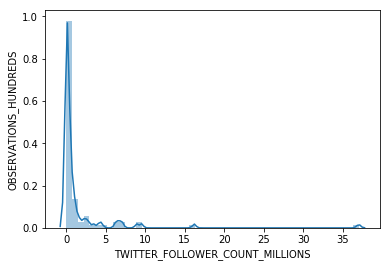

In [31]:
sns.distplot(nba_data.TWITTER_FOLLOWER_COUNT_MILLIONS)
plt.ylabel('OBSERVATIONS_HUNDREDS')

I can see that their is an outlier that lies above 35 million followers. I will need to pull up this observation to see if I need to delete it, or varify that the information is important to my study.

In [32]:
nba_data[nba_data['TWITTER_FOLLOWER_COUNT_MILLIONS'] == 37.000000]

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,NET_RATING,AST_PCT,...,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
6,LeBron James,CLE,32,74,51,23,0.689,37.8,7.7,0.388,...,220,81,125,347,32,35,30.96,26.4,1,37.0


After pulling up the row with the outling data point we can see that it is super star LeBron James. The outlier is not a mistake and LeBron has a major influence over the basketball fan base so it would be bias to delete his observation. I will keep his data points so that I can accuretly analyze the data. I will now use graphs in order to determine if any of these basketball statistics are correlated with the amount of twitter followers a player obtains.

Text(0,0.5,'TWITTER_FOLLOWER_COUNT_MILLIONS')

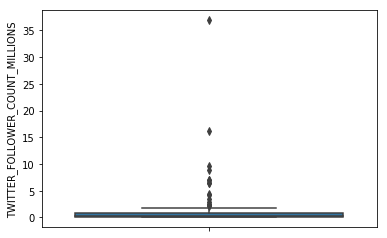

In [33]:
sns.boxplot(y=['TWITTER_FOLLOWER_COUNT_MILLIONS'],data=nba_data)
plt.ylabel('TWITTER_FOLLOWER_COUNT_MILLIONS')

Although hard to read, the interpretation of the boxplot is simple. We can see that most people fall between 0 and 2 million. There are a couple of observations that fall above the average including LeBron James at 37 million follwers.

Text(0,0.5,'# of games/income')

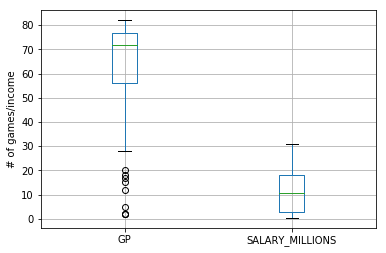

In [51]:
nba_data.boxplot(column=['GP','SALARY_MILLIONS'])
plt.ylabel('# of games/income')

The two variables I am most interested in as independent are Games Played and Salary. So I have pulled up their information using matplotlib as box plots as well. I want to see if more time on the court effects their twitter following and if salary effects their accounts as well. I believe that the more game time would mean more TV exposure and more popularity in social media. I also think that the greater the salary the bigger the following because net_worth is something respected in our culture.

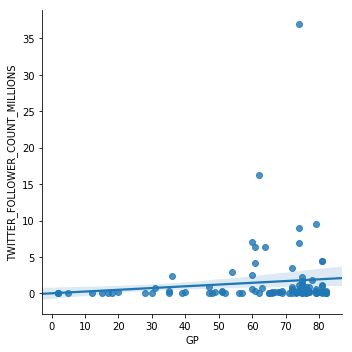

In [17]:
sns.lmplot(x="GP", y="TWITTER_FOLLOWER_COUNT_MILLIONS", data=nba_data)

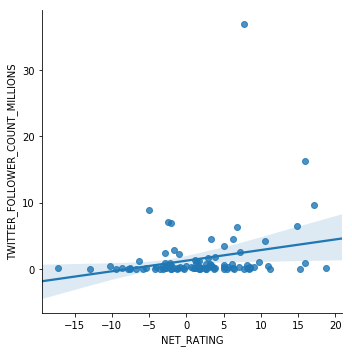

In [18]:
sns.lmplot(x="NET_RATING", y="TWITTER_FOLLOWER_COUNT_MILLIONS", data=nba_data)

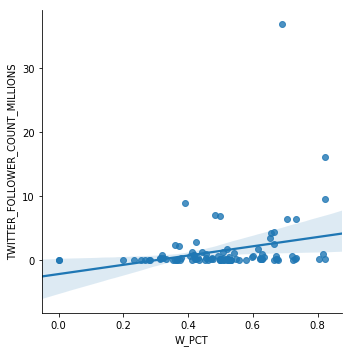

In [14]:
sns.lmplot(x="W_PCT", y="TWITTER_FOLLOWER_COUNT_MILLIONS", data=nba_data)

I have pulled up graphs to determine of there is a relationship between these variables. We can see that there is a minor positive trend with the variables, but most observatinons fall below the average. I even analyized "win percentage" to see if there was a trend however the same results were found. Even with the minor trend I cannot conclude that their is relationship and thus find that their twitter following is mostly random.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

I've imported: pandas, pyplot, and seaborn so that I can read in, clean, and vizualize the information in my TSV.file.

In [2]:
test_data = pd.read_csv("/Users/connerleavitt/Desktop/train.tsv", delimiter="\t")

I will read in data on consumer purchases on used goods as a TSV (tab seperated values). I have read in the data in a similar way as the CSV.file. the only difference is I need a delimiter to format the data properly. I will now pull up the data to see if there is anything I will need to do to modify the data. I will use this data to see if the condition of the used item effects the price. condition is ranked 1-5 in this data set with 1 being the best condition and 5 being the worst.

In [19]:
test_data

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...


We can see that their are missing observations in the "brand_name" column. In order to run the data succesfully, I will need to either drop the column, or drop all observations with "NaN".

In [4]:
test_data_no_missing = test_data.dropna()
test_data_no_missing

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition"
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,43.0,0,Authentic. Suede fringe boots. Great condition...


I dropped all observations with "NaN", however that won't be an issue because after dropping all of those observations we still have over 846,000 observations. Our sample size is still large enough to be considered a normal distribution.

In [5]:
test_data.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


I pulled up the discription of the data so that I can get a better idea of the data in the set. I will also plot the distibution to see how the data is spreadout.

Text(0,0.5,'observations_millions')

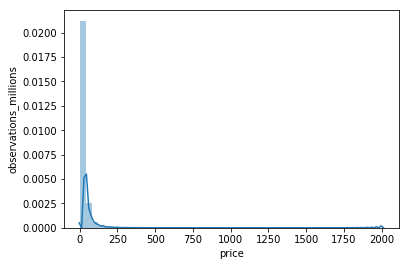

In [34]:
sns.distplot(test_data.price)
plt.ylabel('observations_millions')

After pulling up the distribution, we can see that the right tail extends all the way out to 2000 dollars. I will pull up all observations to understand better what used goods people are willing to spend two grand to purchase. I may see that these outliers need to be deleted or that they are relevant for my study as they could be designer clothes and jewlery.

In [35]:
test_data[test_data['price'] == 2000.0]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
415027,415027,Chanel Classic Jumbo Single flap bag,3,Women/Women's Handbags/Shoulder Bag,Chanel,2000.0,1,Authentic. Pre-loved in Excellent Condition. P...
742113,742113,Chanel Chevron Fuschia Pink 2,1,Women/Women's Handbags/Shoulder Bag,Chanel,2000.0,1,Authentic Brand new The price for this is [rm]...
778940,778940,Mary kay,1,Beauty/Makeup/Face,Mary Kay,2000.0,1,30 time wise sets Oily to combo skin
956343,956343,Chanel Black wallet on chain,1,Women/Women's Handbags/Messenger & Crossbody,Chanel,2000.0,1,Lambskin Color is Black with dark Silver Hardw...
1250053,1250053,Brand New Chanel CC Quilted WOC,2,Women/Women's Handbags/Messenger & Crossbody,Chanel,2000.0,1,This is a brand new Chanel CC Quilted Wallet o...
1445348,1445348,Vs2/I 1ct Diamond Engagement Ring,2,Women/Jewelry/Rings,NaN,2000.0,1,Absolutely stunning diamond engagement ring Pu...


After pulling up the items that cost 2000 dollars we can see that there are only 6 observations at this price point and they are designer clothes, and jewlery. We can also see that the condition of these items is high as all items are ranked 3 or lower. So I will not delete these observations as they are relevant to my study.

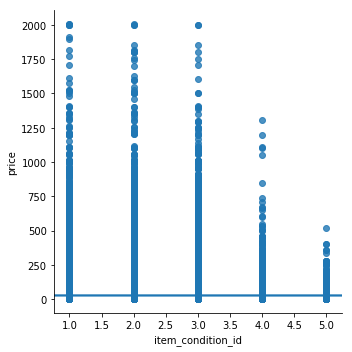

In [36]:
sns.lmplot(x="item_condition_id", y="price", data=test_data)

With this visual aid we can see that an items condition does indeed have an effect on its price. from the graph we can identify that the conditional ranks 1,2, and 3 are regarded very similar when it comes to price. However, there is a steep drop off from 3 to 4 and even more so from 3 to 5. I can conclude that there is a relationship between condition and price. the worst the condition the lower the price, however conditions 1-3 have little variance in price.

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

I've imported: pandas, pyplot, and seaborn so that I can read in, clean, and vizualize the information in my TXT.file. 

In [38]:
airfare_data = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/airfares.txt")

I am bringing in data on air travel so that I can see the relationship between distance and the price of a ticket. Whether the relationship is positive or negative it will be useful to understand how distance effect the fare.

In [39]:
airfare_data

,City Fare Distance
0,1\t360\t1463
1,2\t360\t1448
2,3\t207\t681
3,4\t111\t270
4,5\t93\t190
5,6\t141\t393
6,7\t291\t1102
7,8\t183\t578
8,9\t309\t1204
9,10\t300\t1138


After reading in the data I can see that there is a format issue. I will need to use a delimiter in order to correct the layout.

In [40]:
airfare_data = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/airfares.txt", delimiter="\t")

Now I will check to see if the format has been modified by pulling the data back up

In [41]:
airfare_data

,City,Fare,Distance
0,1,360,1463
1,2,360,1448
2,3,207,681
3,4,111,270
4,5,93,190
5,6,141,393
6,7,291,1102
7,8,183,578
8,9,309,1204
9,10,300,1138


The TXT.file on air fare that I have read in has fewer than 20 observations with 16 total. When I pull up the information from the file into python I can all the data. Therefore I can conclude that the dataset doesn't need to be cleaned or modified in order for me to show case data. We have no outliers, or missing obserations. So, I will jump straight into representing the data with graphs and tables

In [42]:
airfare_data.describe()

,City,Fare,Distance
count,17.000000,17.000000,17.000000
mean,9.000000,228.352941,816.529412
std,5.049752,129.742987,588.794544
min,1.000000,54.000000,90.000000
25%,5.000000,111.000000,270.000000
50%,9.000000,207.000000,681.000000
75%,13.000000,309.000000,1204.000000
max,17.000000,477.000000,1828.000000


the data describition allows me to understand the big picture of the information I have acquired. I can see max and min ticket price as well as distance. So with a general idea, I can begin to show a relationship graphically between the two variables. 

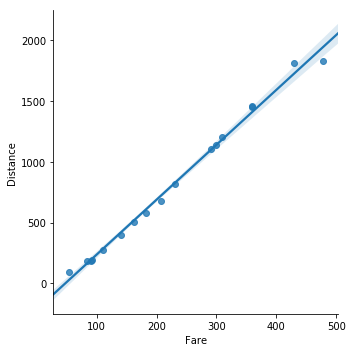

In [43]:
sns.lmplot(x='Fare', y='Distance', data=airfare_data)

Text(0,0.5,'observation')

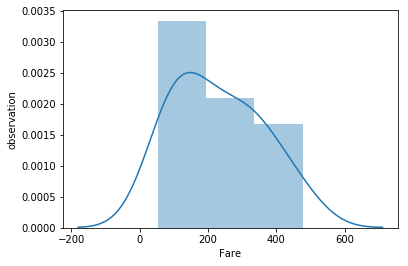

In [49]:
sns.distplot(airfare_data.Fare)
plt.ylabel('observation')

Text(0,0.5,'observation')

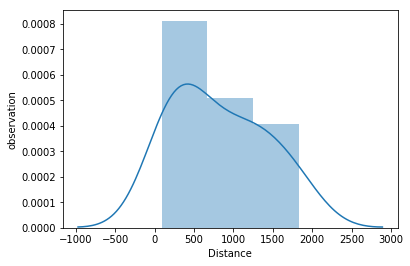

In [50]:
sns.distplot(airfare_data.Distance)
plt.ylabel('observation')

Text(0,0.5,'distance/price')

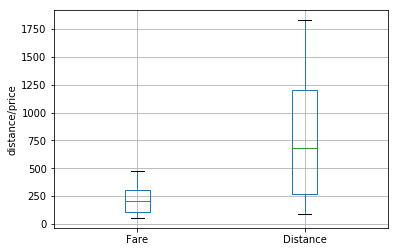

In [48]:
airfare_data.boxplot(column=['Fare','Distance'])
plt.ylabel('distance/price')

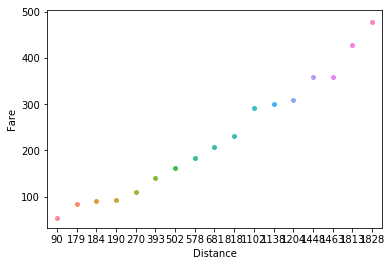

In [47]:
sns.swarmplot(x='Distance', y='Fare', data=airfare_data) 

I can conclude that distance truely does have an effect on the price of the ticket. the relationship is postive as we can see in th graphs above. the further the distance, the greater the price.